In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt

Нейронная сеть

In [11]:
def Relu(x):
    return np.maximum(0, x)

def ReluDerivative(x):
    return (x >= 0).astype(float)

def Softmax(x):
    shiftx = x - np.max(x, axis=1, keepdims=True)
    exps = np.exp(shiftx)
    return exps / np.sum(exps, axis=1, keepdims=True)

def CrossEntropy(x, y):
    N = x.shape[0]
    return -np.sum(y * np.log(x + 1e-10)) / N

def CrossEntropyDerivative(x, y):
    return x - y

# Вовзращает список массивов размером packetSize из входных и соответствующих выходных данных
def CreatePackets(x, y, packetSize):
    nRows = x.shape[0]
    packetResX = []
    packetResY = []
    perm = np.random.permutation(nRows)
    X = x[perm]
    Y = y[perm]
    # Если количество данных не делится на размер пачки
    fullPacketCount = nRows // packetSize
    for k in range(fullPacketCount):
        packetX = X[k * packetSize: k * packetSize + packetSize]
        packetY = Y[k * packetSize: k * packetSize + packetSize]
        packetResX.append(packetX)
        packetResY.append(packetY)
    if nRows % packetSize != 0:
        packetX = X[fullPacketCount * packetSize:]
        packetY = Y[fullPacketCount * packetSize:]
        packetResX.append(packetX)
        packetResY.append(packetY)
    return packetResX, packetResY

class NeuralNetwork:
    def __init__(self, inputNodesCount, hiddenNodesCount, outputNodesCount, learningSpeed):
        self.w1 = np.random.randn(inputNodesCount, hiddenNodesCount)
        self.b1 = np.zeros((1, hiddenNodesCount))
        self.w2 = np.random.randn(hiddenNodesCount, outputNodesCount)
        self.b2 = np.zeros((1, outputNodesCount))
        self.learningSpeed = learningSpeed

    def Forward(self, x):
        self.i1 = np.matmul(x, self.w1) + self.b1 # Значения входа скрытого слоя
        self.o1 = Relu(self.i1) # Значения выхода скрытого слоя
        self.i2 = np.matmul(self.o1, self.w2) + self.b2 # Значения входа выходного слоя
        self.z = Softmax(self.i2) # Значение выхода выходного слоя (вектор результата классификации)
        return self.z

    def Back(self, x, y):
        m = x.shape[0]
        error = CrossEntropyDerivative(self.z, y) # Ошибка полученного результата и эталонного
        db2 = (1 / m) * np.sum(error, axis=0, keepdims=True) # Производная для смещений b2
        dW2 = (1 / m) * np.dot(self.o1.T, error) # Производная для весов w2
        tmp = np.dot(error, self.w2.T) * ReluDerivative(self.i1)
        db1 = (1 / m) * np.sum(tmp, axis=0, keepdims=True) # Производная для смещений b2
        dW1 = (1 / m) * np.dot(x.T, tmp) # Производная для весов w2
        # Спуск против градиента
        self.b2 -= self.learningSpeed * db2
        self.w2 -= self.learningSpeed * dW2
        self.b1 -= self.learningSpeed * db1
        self.w1 -= self.learningSpeed * dW1

    def Train(self, x, y, epochCount, packetSize):
        loss = []
        for epoch in range(epochCount):
            startTime = time.time()
            packetsX, packetsY = CreatePackets(x, y, packetSize)
            for i in range(len(packetsX)):
                packetX = packetsX[i]
                packetY = packetsY[i]
                predictions = self.Forward(packetX) # Вычисление предсказанного значения
                loss.append( CrossEntropy(predictions, packetY) ) # Ошибка предсказания
                self.Back(packetX, packetY) # Обратное распространение ошибки

            epochTime = time.time() - startTime
            print(f"{epoch} Loss: {loss[i]} Time: {epochTime} seconds")

        plt.plot(loss)
        plt.show()

Загрузка обучающих примеров

In [12]:
from tensorflow.keras import datasets
(xTrain, yTrain), (xTest, yTest) = datasets.mnist.load_data()
print(f"xTrain: {xTrain.shape}")
print(f"yTrain: {yTrain.shape}")
print(f"xTest: {xTest.shape}")
print(f"yTest: {yTest.shape}")


11490434/11490434 [==============================] - 2s 0us/step
xTrain: (60000, 28, 28)
yTrain: (60000,)
xTest: (10000, 28, 28)
yTest: (10000,)


Отображение обучающих примеров

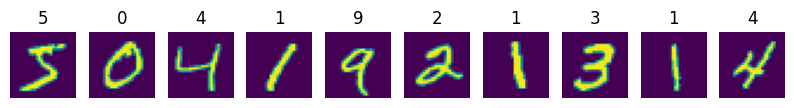

In [13]:
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for ax, image, label in zip(axes, xTrain, yTrain):
    ax.set_title(label)
    ax.imshow(image)
    ax.axis("off")
plt.show()

Определение констант

In [14]:
INPUT_NODES_COUNT = 28 * 28
HIDDEN_NODES_COUNT = 300
OUTPUT_NODES_COUNT = 10
LEARNING_SPEED = 0.1
EPOCHS = 20
PACKET_SIZE = 32

Нормировка

In [15]:
xTrain = xTrain.reshape(xTrain.shape[0], -1) / 255.0 # Перевод трёхмерного массива 60000*28*28 в двумерный 60000*784
xTest = xTest.reshape(xTest.shape[0], -1) / 255.0
yTrain = np.eye(OUTPUT_NODES_COUNT)[yTrain] # Переводит цифру в массив из нулей и единицей на индексе цифры

Обучение

0 Loss: 0.9349928059919355 Time: 3.8135242462158203 seconds
1 Loss: 0.9349928059919355 Time: 3.458496570587158 seconds
2 Loss: 0.9349928059919355 Time: 3.85101318359375 seconds
3 Loss: 0.9349928059919355 Time: 3.8416805267333984 seconds
4 Loss: 0.9349928059919355 Time: 3.8771488666534424 seconds
5 Loss: 0.9349928059919355 Time: 3.9383084774017334 seconds
6 Loss: 0.9349928059919355 Time: 3.9170565605163574 seconds
7 Loss: 0.9349928059919355 Time: 3.939192295074463 seconds
8 Loss: 0.9349928059919355 Time: 3.8891866207122803 seconds
9 Loss: 0.9349928059919355 Time: 3.8104498386383057 seconds
10 Loss: 0.9349928059919355 Time: 3.924285411834717 seconds
11 Loss: 0.9349928059919355 Time: 3.809114456176758 seconds
12 Loss: 0.9349928059919355 Time: 3.8624794483184814 seconds
13 Loss: 0.9349928059919355 Time: 4.039188385009766 seconds
14 Loss: 0.9349928059919355 Time: 3.9247214794158936 seconds
15 Loss: 0.9349928059919355 Time: 3.8539772033691406 seconds
16 Loss: 0.9349928059919355 Time: 3.95994

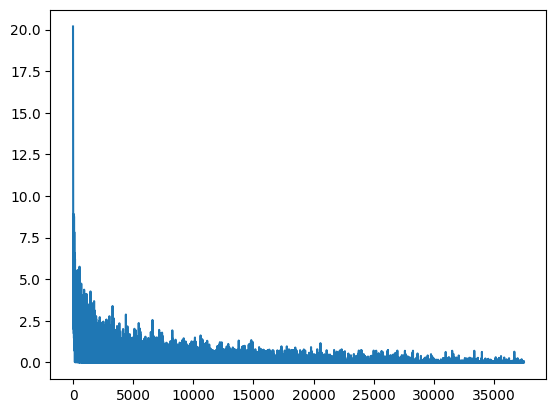

In [16]:
model = NeuralNetwork(inputNodesCount=INPUT_NODES_COUNT,
                            hiddenNodesCount=HIDDEN_NODES_COUNT,
                            outputNodesCount=OUTPUT_NODES_COUNT,
                            learningSpeed=LEARNING_SPEED)
model.Train(xTrain, yTrain, EPOCHS, PACKET_SIZE)

Оценка качества на тестовых данных

In [17]:
predict = model.Forward(xTest)
predictNumber = np.argmax(predict, axis=1)  # Массив предсказанных цифр
accuracy = np.mean(predictNumber == yTest) * 100.0
print(f"Test result: {accuracy}%")

Test result: 95.34%
